In [2]:
# !pip install fastai --upgrade
# https://github.com/fastai/fastbook
# https://github.com/fastai/fastbook.git 
# https://docs.fast.ai/tutorial.vision.html

import pprint
import fastai 
from fastai import  * 
from fastai.vision.all import *
import os,posixpath, pathlib 

def show_dir( obj ): return [item for item in dir( obj ) if not item.startswith('_') ]

show_dir( fastai )
fastai.__version__ 

'2.7.17'

In [3]:
pprint.pprint( show_dir( fastai.vision.data ))

['A',
 'AdaptiveAvgPool',
 'AdaptiveConcatPool1d',
 'AdaptiveConcatPool2d',
 'AddMaskCodes',
 'Any',
 'ArrayBase',
 'ArrayImage',
 'ArrayImageBW',
 'ArrayImageBase',
 'ArrayMask',
 'Article',
 'Aside',
 'AttrDict',
 'AttrDictDefault',
 'AttrGetter',
 'Audio',
 'AutoInit',
 'AvgPool',
 'B',
 'BBoxBlock',
 'BBoxLabeler',
 'BBoxLblBlock',
 'BCELossFlat',
 'BCEWithLogitsLossFlat',
 'BILINEAR',
 'BaseLoss',
 'BatchNorm',
 'BatchNorm1dFlat',
 'BatchSampler',
 'Body',
 'Br',
 'BuiltinFunctionType',
 'BuiltinMethodType',
 'Button',
 'BypassNewMeta',
 'ByteTensor',
 'Callable',
 'Canvas',
 'Caption',
 'Cat',
 'CategoricalDtype',
 'Categorize',
 'Category',
 'CategoryBlock',
 'CategoryMap',
 'Chunks',
 'Code',
 'Col',
 'ColReader',
 'ColSplitter',
 'Colgroup',
 'CollBase',
 'Config',
 'ContextManagers',
 'ConvLayer',
 'Counter',
 'CrossEntropyLossFlat',
 'DataBlock',
 'DataLoader',
 'DataLoaders',
 'Datasets',
 'Dd',
 'Debugger',
 'Details',
 'DiceLoss',
 'Dict',
 'DispatchReg',
 'DisplayedTrans

# Transfer learning 

## Get the data 

In [4]:
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

#dir_list = os.listdir(path)
#print("Files and directories in '", path, "' :")
#print(dir_list[0:10])

img_path = '/home/vscode/.fastai/data/oxford-iiit-pet/images/'
labels_path = '/home/vscode/.fastai/data/oxford-iiit-pet/annotatiopns/'
path.ls()

(#7393) [Path('/home/vscode/.fastai/data/oxford-iiit-pet/images/Abyssinian_155.jpg'),Path('/home/vscode/.fastai/data/oxford-iiit-pet/images/Abyssinian_166.jpg'),Path('/home/vscode/.fastai/data/oxford-iiit-pet/images/keeshond_197.jpg'),Path('/home/vscode/.fastai/data/oxford-iiit-pet/images/leonberger_174.jpg'),Path('/home/vscode/.fastai/data/oxford-iiit-pet/images/pug_158.jpg'),Path('/home/vscode/.fastai/data/oxford-iiit-pet/images/basset_hound_116.jpg'),Path('/home/vscode/.fastai/data/oxford-iiit-pet/images/newfoundland_100.jpg'),Path('/home/vscode/.fastai/data/oxford-iiit-pet/images/beagle_47.jpg'),Path('/home/vscode/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_183.jpg'),Path('/home/vscode/.fastai/data/oxford-iiit-pet/images/english_setter_11.jpg')...]

In [5]:
fnames = get_image_files( img_path ); fnames[0:5]
 

(#5) [Path('/home/vscode/.fastai/data/oxford-iiit-pet/images/Abyssinian_155.jpg'),Path('/home/vscode/.fastai/data/oxford-iiit-pet/images/Abyssinian_166.jpg'),Path('/home/vscode/.fastai/data/oxford-iiit-pet/images/keeshond_197.jpg'),Path('/home/vscode/.fastai/data/oxford-iiit-pet/images/leonberger_174.jpg'),Path('/home/vscode/.fastai/data/oxford-iiit-pet/images/pug_158.jpg')]

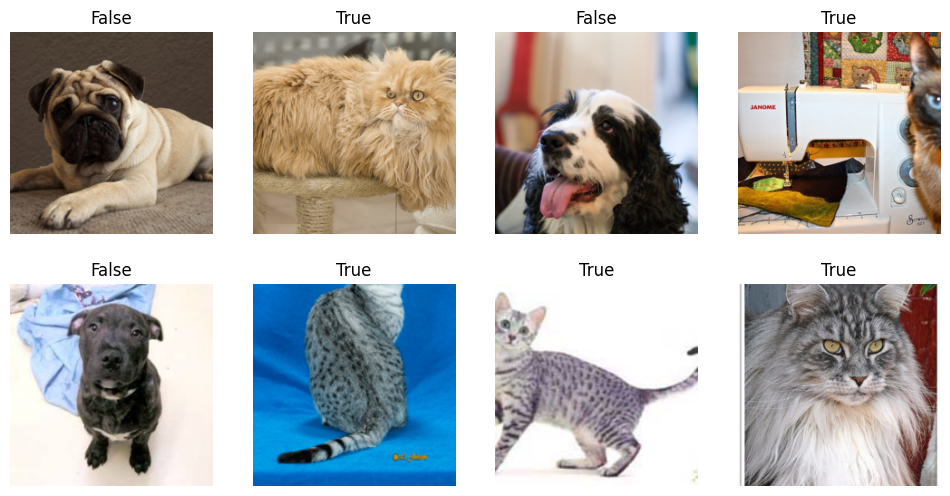

In [8]:
def label_func(f): return f[0].isupper()

#fastai.data.core.DataLoaders
dls = ImageDataLoaders.from_name_func(path, fnames, label_func, item_tfms=Resize(224))

dls.bs = 8 
dls.show_batch(  max_n = 8 )


In [14]:
learn = vision_learner(dls, resnet34, metrics=error_rate)


In [17]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time


: 

In [64]:
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

NameError: name 'get_transforms' is not defined

In [40]:
data = ImageDataBunch.from_name_re(img_path, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)

NameError: name 'ImageDataBunch' is not defined

## Get a pre-trained model 

In [25]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

show_dir( learn )

['T_destination',
 'add_cb',
 'add_cbs',
 'add_module',
 'added_cbs',
 'all_batches',
 'append',
 'apply',
 'arch',
 'bfloat16',
 'buffers',
 'call_super_init',
 'cast_to_tensor',
 'cbs',
 'children',
 'compile',
 'cpu',
 'create_mbar',
 'create_opt',
 'cuda',
 'default_cbs',
 'dls',
 'double',
 'dump_patches',
 'eval',
 'export',
 'extend',
 'extra_repr',
 'fine_tune',
 'fit',
 'fit_flat_cos',
 'fit_one_cycle',
 'fit_sgdr',
 'float',
 'forward',
 'freeze',
 'freeze_to',
 'get_buffer',
 'get_extra_state',
 'get_parameter',
 'get_preds',
 'get_submodule',
 'half',
 'insert',
 'ipu',
 'load',
 'load_state_dict',
 'lock',
 'logger',
 'loss_func',
 'loss_not_reduced',
 'lr',
 'lr_find',
 'metrics',
 'model',
 'model_dir',
 'modules',
 'moms',
 'n_epoch',
 'n_out',
 'named_buffers',
 'named_children',
 'named_modules',
 'named_parameters',
 'no_bar',
 'no_logging',
 'no_mbar',
 'normalize',
 'one_batch',
 'opt',
 'opt_func',
 'ordered_cbs',
 'parameters',
 'path',
 'pop',
 'predict',
 'pret

In [28]:
import numpy as np 

np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)



NameError: name 'ImageDataBunch' is not defined

In [ ]:

#https://github.com/fastai/fastbook
#https://github.com/fastai/fastbook.git

from fastai.vision.all import *

#learn.fine_tune(1)

In [3]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'
learn = vision_learner(dls, resnet34, metrics=error_rate)

NameError: name 'dls' is not defined

In [5]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time


KeyboardInterrupt: 

In [5]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time


: 

In [4]:
??vision_learner


Signature:
vision_learner(
    dls,
    arch,
    normalize=True,
    n_out=None,
    pretrained=True,
    weights=None,
    loss_func=None,
    opt_func=<function Adam at 0x7c89e52684c0>,
    lr=0.001,
    splitter=None,
    cbs=None,
    metrics=None,
    path=None,
    model_dir='models',
    wd=None,
    wd_bn_bias=False,
    train_bn=True,
    moms=(0.95, 0.85, 0.95),
    cut=None,
    init=<function kaiming_normal_ at 0x7c89ffbf6d30>,
    custom_head=None,
    concat_pool=True,
    pool=True,
    lin_ftrs=None,
    ps=0.5,
    first_bn=True,
    bn_final=False,
    lin_first=False,
    y_range=None,
    *,
    n_in=3,
)
Source:   
@delegates(create_vision_model)
def vision_learner(dls, arch, normalize=True, n_out=None, pretrained=True, weights=None,
        # learner args
        loss_func=None, opt_func=Adam, lr=defaults.lr, splitter=None, cbs=None, metrics=None, path=None,
        model_dir='models', wd=None, wd_bn_bias=False, train_bn=True, moms=(0.95,0.85,0.95),
        # mod

In [29]:
??ImageDataLoaders 

Init signature: ImageDataLoaders(*loaders, path: 'str | Path' = '.', device=None)
Source:        
class ImageDataLoaders(DataLoaders):
    "Basic wrapper around several `DataLoader`s with factory methods for computer vision problems"
    @classmethod
    @delegates(DataLoaders.from_dblock)
    def from_folder(cls, path, train='train', valid='valid', valid_pct=None, seed=None, vocab=None, item_tfms=None,
                    batch_tfms=None, img_cls=PILImage, **kwargs):
        "Create from imagenet style dataset in `path` with `train` and `valid` subfolders (or provide `valid_pct`)"
        splitter = GrandparentSplitter(train_name=train, valid_name=valid) if valid_pct is None else RandomSplitter(valid_pct, seed=seed)
        get_items = get_image_files if valid_pct else partial(get_image_files, folders=[train, valid])
        dblock = DataBlock(blocks=(ImageBlock(img_cls), CategoryBlock(vocab=vocab)),
                           get_items=get_items,
                           splitter=s

In [14]:
from fastai.vision.all import get_image_files as get_image_files

get_image_files
#path = untar_data(URLs.PETS)/'images'
#path = untar_data(URLs.PETS)/'images'
#files = get_image_files(path) 
#help( get_image_files )

<function fastai.data.transforms.get_image_files(path, recurse=True, folders=None)>

In [30]:
URLs.PETS

'https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet.tgz'

In [17]:
??get_image_files

Signature: get_image_files(path, recurse=True, folders=None)
Source:   
def get_image_files(path, recurse=True, folders=None):
    "Get image files in `path` recursively, only in `folders`, if specified."
    return get_files(path, extensions=image_extensions, recurse=recurse, folders=folders)
File:      ~/.local/lib/python3.9/site-packages/fastai/data/transforms.py
Type:      function

In [22]:

#f = [o.name for o in os.scandir(path) if o.is_file()]


In [14]:
p = Path(path)
res = [p/f for f in fs if not f.startswith('.')]
res 

NameError: name 'fs' is not defined

In [15]:
def my_get_files(p, fs, extensions=None):
    p = Path(p)
    res = [p/f for f in fs if not f.startswith('.')
           and ((not extensions) or f'.{f.split(".")[-1].lower()}' in extensions)]
    return res

my_get_files( path )

TypeError: my_get_files() missing 1 required positional argument: 'fs'

In [16]:
def my_get_files(p, fs, extensions=None):
    p = Path(p)
    res = [p/f for f in fs if not f.startswith('.')
           and ((not extensions) or f'.{f.split(".")[-1].lower()}' in extensions)]
    return res



In [ ]:
URLS
